<a target="_blank" href="https://colab.research.google.com/github/wbfrench1/stock/blob/main/src/get_stock_data.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
#from yahoofinance import HistoricalPrices
import json
import seaborn as sns
from matplotlib import pyplot as plt
from datetime import datetime

# Plan

1. Pull one stocks data
1. Get Data over a specified period of time and interval
1. Graph stock data over time period
1. Get s&p500 stock tickers
1. Get Multiple Ticker Data

# Next Steps

1. Try different methods of getting multiple ticker data
1. find stocks that have dropped 40% or more in time period
 1. I am having trouble creating the dataframe for the high/low/cur
1. make a bag of functions

# Graph Historical Performance

### Pull one stocks data

In [22]:
msft = yf.Ticker("MSFT")
str_period = '5y'
str_interval = '1mo'

### Get Data over a specified period of time and interval

In [23]:
msft.history(period=str_period,
             interval=str_interval).head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-08-01 00:00:00-04:00,100.282920,106.667053,99.157418,106.241447,456628100,0.42,0.0
2018-09-01 00:00:00-04:00,105.245157,109.460662,101.808197,108.587181,480255500,0.00,0.0
2018-10-01 00:00:00-04:00,108.947952,110.305648,95.048188,101.409416,927548000,0.00,0.0
2018-11-01 00:00:00-04:00,101.637283,106.564858,94.326610,105.283119,720228600,0.46,0.0
2018-12-01 00:00:00-05:00,107.749903,108.150387,89.594520,96.850952,944314600,0.00,0.0


In [24]:
msft.info

HTTPError: ignored

### Graph stock data over time period

TypeError: ignored

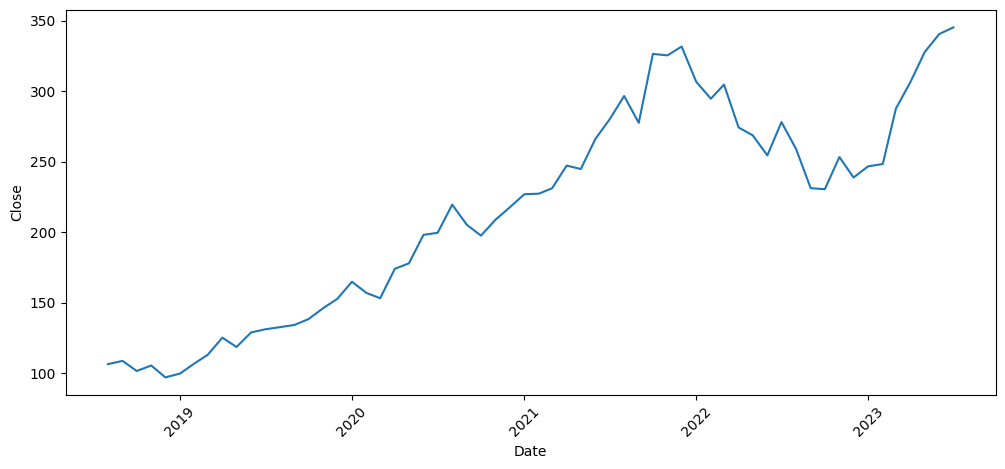

In [12]:
t_figsize = (12,5)
fig, ax = plt.subplots(figsize=t_figsize)
plt.xticks(rotation=45)
sns.lineplot(x= msft.history(period=str_period,
                             interval=str_interval).index,
             y= msft.history(period=str_period,
                             interval=str_interval)['Close'],
             ax= ax).set(title= msft.info['longName'])

In [10]:
msft.history()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-06-15 00:00:00-04:00,337.480011,349.839996,337.200012,348.100006,38899100,0.0,0.0
2023-06-16 00:00:00-04:00,351.320007,351.470001,341.950012,342.329987,46533600,0.0,0.0
2023-06-20 00:00:00-04:00,339.309998,342.079987,335.859985,338.049988,26375400,0.0,0.0
2023-06-21 00:00:00-04:00,336.369995,337.730011,332.070007,333.559998,25117800,0.0,0.0
2023-06-22 00:00:00-04:00,334.119995,340.119995,333.339996,339.709991,23556800,0.0,0.0
2023-06-23 00:00:00-04:00,334.359985,337.959991,333.450012,335.019989,23084700,0.0,0.0
2023-06-26 00:00:00-04:00,333.720001,336.109985,328.489990,328.600006,21520600,0.0,0.0
2023-06-27 00:00:00-04:00,331.859985,336.149994,329.299988,334.570007,24354100,0.0,0.0
2023-06-28 00:00:00-04:00,334.660004,337.980011,333.809998,335.850006,20259500,0.0,0.0


In [11]:
msft.info['open']

TypeError: ignored

# Get s&p500 stock tickers

In [5]:
table=pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
df_sp500_co_info = table[0]
df_sp500_co_info.head()

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989


In [6]:
df_sp500_co_info['Symbol']

0       MMM
1       AOS
2       ABT
3      ABBV
4       ACN
       ... 
498     YUM
499    ZBRA
500     ZBH
501    ZION
502     ZTS
Name: Symbol, Length: 503, dtype: object

https://www.marketdata.app/how-to-use-the-yahoo-finance-api/

# Get Multiple Ticker Data

## Put S&P 500 tickers into a string

In [7]:
# If the below download fails, then it might be because of the replacement of . with -
str_sp500_stk_tkrs= ' '.join(i if '.' not in i else i.replace('.','-') for i in df_sp500_co_info['Symbol'])
print('Number of tickers in sp500:', len(df_sp500_co_info['Symbol']), '\n')
str_sp500_stk_tkrs

Number of tickers in sp500: 503 



'MMM AOS ABT ABBV ACN ATVI ADM ADBE ADP AAP AES AFL A APD AKAM ALK ALB ARE ALGN ALLE LNT ALL GOOGL GOOG MO AMZN AMCR AMD AEE AAL AEP AXP AIG AMT AWK AMP ABC AME AMGN APH ADI ANSS AON APA AAPL AMAT APTV ACGL ANET AJG AIZ T ATO ADSK AZO AVB AVY AXON BKR BALL BAC BBWI BAX BDX WRB BRK-B BBY BIO TECH BIIB BLK BK BA BKNG BWA BXP BSX BMY AVGO BR BRO BF-B BG CHRW CDNS CZR CPT CPB COF CAH KMX CCL CARR CTLT CAT CBOE CBRE CDW CE CNC CNP CDAY CF CRL SCHW CHTR CVX CMG CB CHD CI CINF CTAS CSCO C CFG CLX CME CMS KO CTSH CL CMCSA CMA CAG COP ED STZ CEG COO CPRT GLW CTVA CSGP COST CTRA CCI CSX CMI CVS DHI DHR DRI DVA DE DAL XRAY DVN DXCM FANG DLR DFS DIS DG DLTR D DPZ DOV DOW DTE DUK DD DXC EMN ETN EBAY ECL EIX EW EA ELV LLY EMR ENPH ETR EOG EPAM EQT EFX EQIX EQR ESS EL ETSY EG EVRG ES EXC EXPE EXPD EXR XOM FFIV FDS FICO FAST FRT FDX FITB FSLR FE FIS FI FLT FMC F FTNT FTV FOXA FOX BEN FCX GRMN IT GEHC GEN GNRC GD GE GIS GM GPC GILD GL GPN GS HAL HIG HAS HCA PEAK HSIC HSY HES HPE HLT HOLX HD HON HRL HST

## Query Multiple Tickers

In [36]:
str_today = datetime.today().strftime("%Y-%m-%d")

In [37]:
data = yf.download(str_sp500_stk_tkrs, start="2018-01-01", end=str_today)

[*********************100%***********************]  503 of 503 completed


In [42]:
print('data.shape:', data.shape)
data.tail(5)

data.shape: (1392, 3018)


Adj Close                                                \
                     A        AAL        AAP        AAPL        ABBV   
Date                                                                   
2023-07-10  118.360001  18.570000  68.556892  188.610001  133.015381   
2023-07-11  118.480003  18.799999  69.872231  188.080002  134.083542   
2023-07-12  120.000000  18.570000  70.500000  189.770004  133.500000   
2023-07-13  119.349998  18.450001  70.660004  190.539993  133.589996   
2023-07-14  119.750000  18.139999  70.639999  190.690002  136.009995   

                                                                       ...  \
                   ABC         ABT       ACGL         ACN        ADBE  ...   
Date                                                                   ...   
2023-07-10  192.830002  106.509186  74.709999  307.334595  496.350006  ...   
2023-07-11  193.220001  106.986900  75.919998  308.600006  504.739990  ...   
2023-07-12  190.800003  106.340004  76.379997  313.880005  507.359985  ...   
2023-07-13  191.279999  107.739998  76.879997  315.209991  517.280029  ...   
2023-07-14  191.419998  107.930000  77.000000  315.769989  514.830017  ...   

             Volume                                                         \
               WYNN      XEL       XOM     XRAY      XYL      YUM      ZBH   
Date                                                                         
2023-07-10  2577800  4047400  14877600  2046600  1132400  1276000  1421300   
2023-07-11  1761800  2878800  12581100  2013400  1202800  1438300   819900   
2023-07-12  1772900  3137700  13238200  1609900  1281500  1147700   969500   
2023-07-13  2271600  2925000  26826800  1641500  1370800  1372000   966500   
2023-07-14  1455500  2500500  28165400  1291000   909300  1031800  1191200   

                                      
              ZBRA     ZION      ZTS  
Date                                  
2023-07-10  403400  3528700  1280100  
2023-07-11  307500  4056600  1081300  
2023-07-12  347500  5962600  1471800  
2023-07-13  216800  2940900  1001500  
2023-07-14  298000  4586200  2455900  

[5 rows x 3018 columns]

In [39]:
# convert the index to datetime
data.index = pd.to_datetime(data.index)
data.index

DatetimeIndex(['2018-01-02', '2018-01-03', '2018-01-04', '2018-01-05',
               '2018-01-08', '2018-01-09', '2018-01-10', '2018-01-11',
               '2018-01-12', '2018-01-16',
               ...
               '2023-06-30', '2023-07-03', '2023-07-05', '2023-07-06',
               '2023-07-07', '2023-07-10', '2023-07-11', '2023-07-12',
               '2023-07-13', '2023-07-14'],
              dtype='datetime64[ns]', name='Date', length=1392, freq=None)

In [40]:
#Get today's Date
ts_clst_day = data.index[data.index.get_indexer([datetime.today()], method='nearest')]
ts_clst_day

DatetimeIndex(['2023-07-14'], dtype='datetime64[ns]', name='Date', freq=None)

## Create Min/Max Current DataFrame

In [43]:
df_cur_stkpr = data.loc[ts_clst_day, 'Adj Close'].stack().loc[ts_clst_day,:].copy()

In [53]:
df_cur_stkpr1 = df_cur_stkpr.loc[ts_clst_day].reset_index().drop(columns='Date').set_index('level_1')
df_cur_stkpr1
#df_cur_stkpr.loc['2023-07-07']
#ts_clst_day[0].strftime('YYYY-MM-DD')

,0
level_1,
A,119.750000
AAL,18.139999
AAP,70.639999
AAPL,190.690002
ABBV,136.009995
...,...
YUM,135.559998
ZBH,142.369995
ZBRA,309.279999


In [63]:
pd.DataFrame(df_cur_stkpr1).rename(columns={0:'Cur_StkPr'})

,Cur_StkPr
level_1,
A,119.750000
AAL,18.139999
AAP,70.639999
AAPL,190.690002
ABBV,136.009995
...,...
YUM,135.559998
ZBH,142.369995
ZBRA,309.279999


In [129]:
# The idea here is to find the index of the min/max values to facilitate
# getting the date of the min/max
data.reset_index()[['Adj Close']].idxmax()

Adj Close  A        925
           AAL        8
           AAP     1011
           AAPL    1382
           ABBV    1075
                   ... 
           YUM     1341
           ZBH      836
           ZBRA     993
           ZION    1038
           ZTS     1005
Length: 503, dtype: int64

In [100]:
# Show period low, high, current
df_min_max = pd.concat([pd.DataFrame(data['Adj Close'].min(),
                        columns=['5Yr_StkPr_Low']
                        ),
                        pd.DataFrame(data['Adj Close'].max(),
                                     columns=['5Yr_StkPr_High']),
                        pd.DataFrame(df_cur_stkpr1).rename(columns={0:'Cur_StkPr'})], axis=1)
df_min_max.head()

,5Yr_StkPr_Low,5Yr_StkPr_High,Cur_StkPr
A,58.797665,177.025665,119.750000
AAL,9.040000,56.988724,18.139999
AAP,63.355339,229.554703,70.639999
AAPL,34.209965,193.970001,190.690002
ABBV,52.443928,165.176773,136.009995


In [101]:
df_min_max_cur= df_min_max.merge(df_sp500_co_info[['Symbol',
                                               'Security']],
                             how='left', left_index= True,
                             right_on='Symbol').copy()
df_min_max_cur.head()

,5Yr_StkPr_Low,5Yr_StkPr_High,Cur_StkPr,Symbol,Security
12.0,58.797665,177.025665,119.750000,A,Agilent Technologies
29.0,9.040000,56.988724,18.139999,AAL,American Airlines Group
9.0,63.355339,229.554703,70.639999,AAP,Advance Auto Parts
44.0,34.209965,193.970001,190.690002,AAPL,Apple Inc.
3.0,52.443928,165.176773,136.009995,ABBV,AbbVie


In [102]:
df_min_max_cur = df_min_max_cur.reset_index().drop(columns='index').copy()
df_min_max_cur

,5Yr_StkPr_Low,5Yr_StkPr_High,Cur_StkPr,Symbol,Security
0,58.797665,177.025665,119.750000,A,Agilent Technologies
1,9.040000,56.988724,18.139999,AAL,American Airlines Group
2,63.355339,229.554703,70.639999,AAP,Advance Auto Parts
3,34.209965,193.970001,190.690002,AAPL,Apple Inc.
4,52.443928,165.176773,136.009995,ABBV,AbbVie
...,...,...,...,...,...
498,53.255268,142.236282,135.559998,YUM,Yum! Brands
499,76.251190,170.515823,142.369995,ZBH,Zimmer Biomet
500,103.709999,614.549988,309.279999,ZBRA,Zebra Technologies
501,19.586090,70.517990,30.700001,ZION,Zions Bancorporation


In [103]:
df_min_max_cur= df_min_max_cur[['Symbol', 'Security','5Yr_StkPr_Low',
                                '5Yr_StkPr_High', 'Cur_StkPr']].copy()

# Find % Decline from High

In [104]:
df_min_max_cur['Pct_Chg_f_High'] = ((df_min_max_cur['Cur_StkPr']
                                    - df_min_max_cur['5Yr_StkPr_High']
                                    )
                                     /df_min_max_cur['5Yr_StkPr_High']
                                    )
df_min_max_cur

,Symbol,Security,5Yr_StkPr_Low,5Yr_StkPr_High,Cur_StkPr,Pct_Chg_f_High
0,A,Agilent Technologies,58.797665,177.025665,119.750000,-0.323544
1,AAL,American Airlines Group,9.040000,56.988724,18.139999,-0.681691
2,AAP,Advance Auto Parts,63.355339,229.554703,70.639999,-0.692274
3,AAPL,Apple Inc.,34.209965,193.970001,190.690002,-0.016910
4,ABBV,AbbVie,52.443928,165.176773,136.009995,-0.176579
...,...,...,...,...,...,...
498,YUM,Yum! Brands,53.255268,142.236282,135.559998,-0.046938
499,ZBH,Zimmer Biomet,76.251190,170.515823,142.369995,-0.165063
500,ZBRA,Zebra Technologies,103.709999,614.549988,309.279999,-0.496737
501,ZION,Zions Bancorporation,19.586090,70.517990,30.700001,-0.564650


In [97]:
threshold = -.5

In [105]:
# try to add the dates that the low and high prices were reached
print(df_min_max_cur.loc[(df_min_max_cur['Pct_Chg_f_High'] < threshold)].shape, '\n')
df_min_max_cur.loc[(df_min_max_cur['Pct_Chg_f_High'] < threshold)].sort_values(by='Pct_Chg_f_High')

(38, 6) 



,Symbol,Security,5Yr_StkPr_Low,5Yr_StkPr_High,Cur_StkPr,Pct_Chg_f_High
479,WBD,Warner Bros. Discovery,8.870000,77.269997,12.400000,-0.839524
358,PARA,Paramount Global,10.181964,93.145004,15.960000,-0.828654
466,VFC,VF Corporation,16.759623,88.050568,19.190001,-0.782057
474,VTRS,Viatris,8.189326,43.623085,10.160000,-0.767096
388,PYPL,PayPal,59.369999,308.529999,72.099998,-0.766311
316,MRNA,Moderna,12.260000,484.470001,121.349998,-0.749520
85,CCL,Carnival,6.380000,66.217567,17.230000,-0.739797
323,MTCH,Match Group,29.885286,175.529999,48.070000,-0.726144
207,GNRC,Generac,43.340000,505.799988,142.880005,-0.717517
148,DXC,DXC Technology,9.129641,92.399757,27.730000,-0.699891
